## Swedish Auto Insurance Dataset 

### 1. Introduction

> The Swedish Auto Insurance Dataset involves predicting the total payment for all claims in thousands of Swedish Kronor, given the total number of claims.
> It is a regression problem. It is comprised of 63 observations with 1 input variable and one output variable. The variable names are as follows:
>  1. Number of claims.
>  2. Total payment for all claims in thousands of Swedish Kronor.

In [34]:
## Loading the dataset from github repo

import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url='https://raw.githubusercontent.com/hargurjeet/MachineLearning/Swedish-Auto-Insurance-Dataset/insurance.csv'

df_raw=pd.read_csv(url,sep='delimiter', header=None,  engine='python')

In [35]:
## Dropping intial junk values,renaming the column and resetting the index values
df = df_raw.drop([0, 1, 2, 3], axis=0).reset_index(drop=True).rename(columns={0:'No_Of_Claims'})
df = df.No_Of_Claims.str.split(',',expand=True).rename(columns={0:'No_Of_Claims', 1:'Total_Payment'})
df.head()

,No_Of_Claims,Total_Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No_Of_Claims   63 non-null     object
 1   Total_Payment  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [37]:
df.describe()

,No_Of_Claims,Total_Payment
count,63,63
unique,40,62
top,13,77.5
freq,4,2


In [38]:
## Convert the columns to Numberic values
df.No_Of_Claims = pd.to_numeric(df.No_Of_Claims, errors='coerce')
df.Total_Payment = pd.to_numeric(df.Total_Payment, errors='coerce')

### 2. Feature Analysis

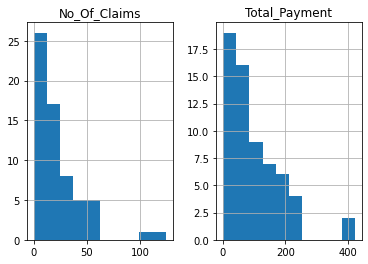

In [39]:
df.hist();

In [40]:
##Segregating the No of claims to various categories
import numpy as np
df["No_Of_Claims_Category"] = pd.cut(df["No_Of_Claims"],
                               bins=[0.0, 15, 30, 45, 60, np.inf],
                                labels=[1, 2, 3, 4, 5])

In [41]:
df.No_Of_Claims_Category.value_counts()

1    32
2    16
3     6
4     5
5     3
Name: No_Of_Claims_Category, dtype: int64

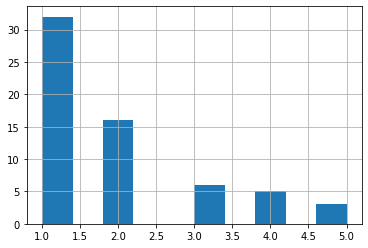

In [42]:
df.No_Of_Claims_Category.hist();

### 3. Data Cleaning
> This acitivity is performed to remove the junk values from dataset.

In [43]:
#Valdating if the dataset have any null values
np.any(np.isnan(df))

True

In [44]:
#Filtering out the null values
df[df.No_Of_Claims_Category.isnull()]

,No_Of_Claims,Total_Payment,No_Of_Claims_Category
30,0,0.0,NaN


In [45]:
#Droping the NAN record
df = df.dropna().reset_index(drop=True)
df

,No_Of_Claims,Total_Payment,No_Of_Claims_Category
0,108,392.5,5
1,19,46.2,2
2,13,15.7,1
3,124,422.2,5
4,40,119.4,3
...,...,...,...
57,9,87.4,1
58,31,209.8,3
59,14,95.5,1
60,53,244.6,4


### 4. Applying Train,Test split

In [57]:
## Applyting the Stratifiedshufflesplit and ensuring No_of_claims_category is 
## equally spread across training and testing set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["No_Of_Claims_Category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [58]:
df["No_Of_Claims_Category"].value_counts()/len(df)

1    0.516129
2    0.258065
3    0.096774
4    0.080645
5    0.048387
Name: No_Of_Claims_Category, dtype: float64

In [59]:
strat_test_set["No_Of_Claims_Category"].value_counts()/len(strat_test_set)

1    0.538462
2    0.230769
5    0.076923
4    0.076923
3    0.076923
Name: No_Of_Claims_Category, dtype: float64

In [60]:
strat_train_set["No_Of_Claims_Category"].value_counts()/len(strat_train_set)

1    0.510204
2    0.265306
3    0.102041
4    0.081633
5    0.040816
Name: No_Of_Claims_Category, dtype: float64

In [62]:
## removing the No_Of_Claims_Category column as this column is no longer needed as it was primarly created for the shuffle split
for set_ in (strat_train_set, strat_test_set):
    set_.drop("No_Of_Claims_Category", axis=1, inplace=True)

In [63]:
## Assigning Training and testing set logical names
df_prepared = strat_train_set.drop("Total_Payment", axis=1)
df_labeled =  strat_train_set.drop("No_Of_Claims", axis=1)

test_prepared = strat_test_set.drop("Total_Payment", axis=1)
test_labeled = strat_test_set.drop("No_Of_Claims", axis=1)

In [64]:
## Verifing the co relation

corr_matrix = df.corr()
corr_matrix["Total_Payment"].sort_values(ascending=False)

Total_Payment    1.000000
No_Of_Claims     0.911434
Name: Total_Payment, dtype: float64

The above results show Total Payments are heavily co related with No of claims and have positive co relation

### 5. Training on ML model

In [65]:
## Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df_prepared, df_labeled)
some_data = df_prepared.iloc[:5]
some_labels = df_labeled.iloc[:5]

print("Predictions:", reg.predict(some_data))
print(some_labels)

Predictions: [[104.46263647]
 [121.33035548]
 [ 47.11239183]
 [ 36.99176042]
 [198.92186292]]
    Total_Payment
30           69.2
55          194.5
47           76.1
10           20.9
60          244.6


> As we observe the predticiton are pretty poor, Calculating the RMSE and MAE below

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Predictions = reg.predict(df_prepared)
lin_mse = mean_squared_error(df_prepared, df_labeled)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(df_labeled, Predictions)
lin_mae

print('RMSE:',lin_rmse)
print('MAE:',lin_mae)

RMSE: 96.0139945156806
MAE: 30.025048703849873


### 6. Cross validation to select the best ML model

In [22]:
##Running the cross validation

from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(reg, df_prepared, df_labeled,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Avg RMSE:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [45.93137478 43.33014184 23.57398472 37.80516561 29.12759566 37.67055829
 47.58755771 45.00323988 25.08031976 34.47086791]
Avg RMSE: 36.95808061602818
Standard deviation: 8.293230180668596


> Evalutating few other models to determine the best model

<b> Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labeled)

tree_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labeled, tree_predictions)
tree_rmse = np.sqrt(tree_mse)

print('RMSE:', tree_rmse)

scores = cross_val_score(tree_reg, df_prepared, df_labeled,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print()
print('Post cross validation')
display_scores(tree_rmse_scores)

RMSE: 18.81449768474438

Post cross validation
Scores: [59.27081913 79.53056016 55.37422686 42.43958647 44.15517586 48.88182689
 62.31400324 39.23216155 44.16155253 24.53110271]
Avg RMSE: 49.98910154074646
Standard deviation: 14.247064782849769


Although the RMSE scores are low (18.8) the model seems to be overfitting. After the cross validation the model seems to be performing worst than linear regression.Let us try one more model

<b> RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared, df_labeled)

random_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labeled, random_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores = cross_val_score(forest_reg, df_prepared, df_labeled,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print()
display_scores(forest_rmse_scores)


Scores: [56.0549848  86.21217602 43.14113292 40.00889285 36.55617925 43.30750869
 60.92392662 40.77479805 38.37979369 27.02343553]
Avg RMSE: 47.238282841486594
Standard deviation: 15.847693794692512


Following Models have been evaluated

<b>  - LinearRegression <br>
<b>  - DecisionTree <br>
<b>  - RandomForest <br>

After reviewing the RMS's Scores Linear regression seems to be the best fit


In [68]:
## Running the Linear regression model on the test set
reg = LinearRegression().fit(test_prepared, test_labeled)
some_data = test_prepared.iloc[:5]
some_labels = test_labeled.iloc[:5]

print("Predictions:", reg.predict(some_data))
print(some_labels)

Predictions: [[ 37.75981206]
 [151.05043706]
 [ 61.79115676]
 [ 30.89371358]
 [ 44.62591055]]
    Total_Payment
26           11.8
42          152.8
34           57.2
15            6.6
17           50.9


In [69]:
Predictions = reg.predict(test_prepared)
lin_mse = mean_squared_error(test_prepared, test_labeled)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(test_labeled, Predictions)
lin_mae

print('RMSE:',lin_rmse)
print('MAE:',lin_mae)

RMSE: 118.03624932132566
MAE: 24.384526851353776


### 7. Model Performance

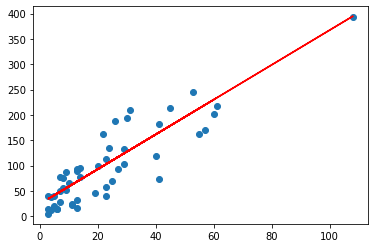

In [70]:
import matplotlib.pyplot as plt

plt.scatter(df_prepared, df_labeled)
plt.plot(df_prepared,reg.predict(df_prepared),color='red');